In [22]:
from keras.layers import SimpleRNN, Embedding
from keras.models import Sequential
model= Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


In [23]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Sometimes is useful to stack several recurrent layers one after the other to increase the representation power of the network

In [24]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


We will now use the model on the data set os the movie review from IMDB

In [25]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)



Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [26]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 14s 688us/step - loss: 0.6450 - acc: 0.6115 - val_loss: 0.5382 - val_acc: 0.7328
Epoch 2/10
20000/20000 [==============================] - 14s 679us/step - loss: 0.4020 - acc: 0.8269 - val_loss: 0.4328 - val_acc: 0.8060
Epoch 3/10
20000/20000 [==============================] - 13s 663us/step - loss: 0.2976 - acc: 0.8819 - val_loss: 0.3585 - val_acc: 0.8472
Epoch 4/10
20000/20000 [==============================] - 13s 668us/step - loss: 0.2298 - acc: 0.9116 - val_loss: 0.3913 - val_acc: 0.8440
Epoch 5/10
20000/20000 [==============================] - 13s 667us/step - loss: 0.1612 - acc: 0.9405 - val_loss: 0.3735 - val_acc: 0.8488
Epoch 6/10
20000/20000 [==============================] - 13s 660us/step - loss: 0.1089 - acc: 0.9627 - val_loss: 0.3858 - val_acc: 0.8678
Epoch 7/10
20000/20000 [==============================] - 13s 657us/step - loss: 0.0746 - acc: 0.9765 - val_loss: 0.4

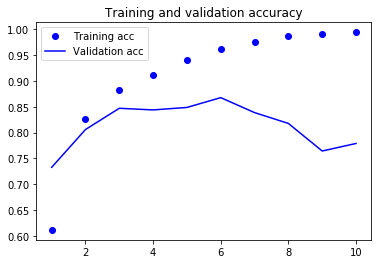

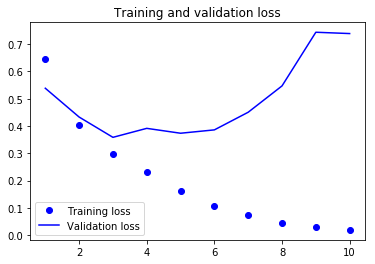

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Using a LSTM layer in Keras

In [28]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.5092 - acc: 0.7604 - val_loss: 0.4559 - val_acc: 0.7770
Epoch 2/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.2894 - acc: 0.8877 - val_loss: 0.3280 - val_acc: 0.8538
Epoch 3/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.2337 - acc: 0.9117 - val_loss: 0.3184 - val_acc: 0.8838
Epoch 4/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.1955 - acc: 0.9284 - val_loss: 0.3646 - val_acc: 0.8494
Epoch 5/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.1719 - acc: 0.9374 - val_loss: 0.3037 - val_acc: 0.8884
Epoch 6/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.1538 - acc: 0.9443 - val_loss: 0.3735 - val_acc: 0.8694
Epoch 7/10
20000/20000 [==============================] - 40s 2ms/step - loss: 0.1414 - acc: 0.9477 - val_loss: 0.3055 - val_acc:

# Temperature 

In [29]:
import os

data_dir = '/Users/admin/Downloads/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [30]:
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

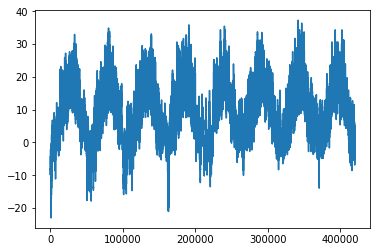

In [31]:
from matplotlib import pyplot as plt

temp = float_data[:, 1] 
plt.plot(range(len(temp)), temp)

Preparing the data

In [32]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

In [33]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [34]:
lookback = 1440
step = 6
delay = 144
batch_size = 128
train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback)

test_steps = (len(float_data) - 300001 - lookback)



In [13]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
evaluate_naive_method()

KeyboardInterrupt: 

This is the common sense aproach, where we just assume that the temperature 24h from now will be the same as the current temperature. The accuracy obtained from further models asto be bether than this one.
We will start by creating a **densely connected model**


In [35]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=500)

Epoch 1/20
500/500 [==============================] - 8s 16ms/step - loss: 1.4787 - val_loss: 0.8040
Epoch 2/20
500/500 [==============================] - 7s 14ms/step - loss: 0.5361 - val_loss: 0.3110
Epoch 3/20
500/500 [==============================] - 7s 14ms/step - loss: 0.3139 - val_loss: 0.3013
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2736 - val_loss: 0.3230
Epoch 5/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2576 - val_loss: 0.3196
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2458 - val_loss: 0.3098
Epoch 7/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2395 - val_loss: 0.3114
Epoch 8/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2313 - val_loss: 0.3084
Epoch 9/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2279 - val_loss: 0.3435
Epoch 10/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2227 - val_lo

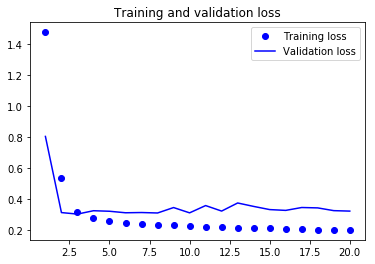

In [36]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Some of the validation losses are close to the no-learning baseline, but not reliably.

**Recurrent NN: GRU layer**

In [37]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=500)

Epoch 1/20
500/500 [==============================] - 54s 108ms/step - loss: 0.3011 - val_loss: 0.2675
Epoch 2/20
500/500 [==============================] - 53s 105ms/step - loss: 0.2850 - val_loss: 0.2746
Epoch 3/20
500/500 [==============================] - 53s 106ms/step - loss: 0.2800 - val_loss: 0.2708
Epoch 4/20
500/500 [==============================] - 53s 107ms/step - loss: 0.2735 - val_loss: 0.2697
Epoch 5/20
500/500 [==============================] - 52s 105ms/step - loss: 0.2677 - val_loss: 0.2583
Epoch 6/20
500/500 [==============================] - 53s 105ms/step - loss: 0.2635 - val_loss: 0.2628
Epoch 7/20
500/500 [==============================] - 53s 105ms/step - loss: 0.2593 - val_loss: 0.2592
Epoch 8/20
500/500 [==============================] - 53s 105ms/step - loss: 0.2532 - val_loss: 0.2606
Epoch 9/20
500/500 [==============================] - 53s 106ms/step - loss: 0.2485 - val_loss: 0.2709
Epoch 10/20
500/500 [==============================] - 53s 105ms/step - l

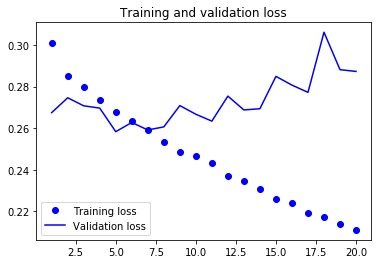

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We can see that the validation MAE is around 0.265 before it starts overfitting, which is an improvement when compared to the results obtained in the densely connected example.

## Using recurrent dropout to fight overfitting

In [40]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=500)

Epoch 1/40
500/500 [==============================] - 62s 125ms/step - loss: 0.3333 - val_loss: 0.2755
Epoch 2/40
500/500 [==============================] - 61s 122ms/step - loss: 0.3139 - val_loss: 0.2798
Epoch 3/40
500/500 [==============================] - 61s 122ms/step - loss: 0.3071 - val_loss: 0.2656
Epoch 4/40
500/500 [==============================] - 61s 122ms/step - loss: 0.3017 - val_loss: 0.2656
Epoch 5/40
500/500 [==============================] - 62s 124ms/step - loss: 0.2998 - val_loss: 0.2802
Epoch 6/40
500/500 [==============================] - 61s 122ms/step - loss: 0.2955 - val_loss: 0.2634
Epoch 7/40
500/500 [==============================] - 61s 122ms/step - loss: 0.2941 - val_loss: 0.2627
Epoch 8/40
500/500 [==============================] - 62s 123ms/step - loss: 0.2937 - val_loss: 0.2827
Epoch 9/40
500/500 [==============================] - 61s 122ms/step - loss: 0.2913 - val_loss: 0.2582
Epoch 10/40
500/500 [==============================] - 61s 122ms/step - l

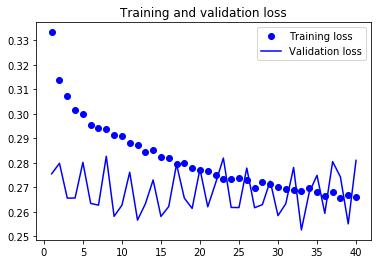

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We were able to solve the overfitting problem but we encounter a performance bottleneck since the scores are not much better than they were before,so solve this we will increase the network capacity

## Stacking recurrent layers

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

## Bidirectional RNN

we will start by testing the model in reverse chronological order, to test the hypothesis that in text its possible to understand in reverse order.

In [43]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)



Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 58s 3ms/step - loss: 0.4883 - acc: 0.7671 - val_loss: 0.3865 - val_acc: 0.8466
Epoch 2/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.3160 - acc: 0.8792 - val_loss: 0.3330 - val_acc: 0.8726
Epoch 3/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.2604 - acc: 0.9021 - val_loss: 0.3287 - val_acc: 0.8732
Epoch 4/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.2209 - acc: 0.9193 - val_loss: 0.5315 - val_acc: 0.7954
Epoch 5/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1963 - acc: 0.9303 - val_loss: 0.3986 - val_acc: 0.8716
Epoch 6/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1780 - acc: 0.9390 - val_loss: 0.3863 - val_acc: 0.8760
Epoch 7/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1562 - acc: 0.9456 - val_loss: 0.3696 - val_acc:

We obtain results similar to when performing the model in the correct order. We will now apply the bidirectional layer

In [44]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 67s 3ms/step - loss: 0.5567 - acc: 0.7176 - val_loss: 0.4163 - val_acc: 0.8384
Epoch 2/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.3379 - acc: 0.8678 - val_loss: 0.3119 - val_acc: 0.8790
Epoch 3/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.2720 - acc: 0.9018 - val_loss: 0.3962 - val_acc: 0.8674
Epoch 4/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.2263 - acc: 0.9174 - val_loss: 0.3400 - val_acc: 0.8788
Epoch 5/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.2059 - acc: 0.9268 - val_loss: 0.3906 - val_acc: 0.8736
Epoch 6/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.1843 - acc: 0.9357 - val_loss: 0.3745 - val_acc: 0.8772
Epoch 7/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.1737 - acc: 0.9408 - val_loss: 0.3334 - val_acc: